In [1]:
import sys
sys.path

['',
 '/home/kranthidr/projects/ml_lab/tf-lab',
 '/home/kranthidr/.virtualenvs/tf-lab/lib64/python35.zip',
 '/home/kranthidr/.virtualenvs/tf-lab/lib64/python3.5',
 '/home/kranthidr/.virtualenvs/tf-lab/lib64/python3.5/plat-linux',
 '/home/kranthidr/.virtualenvs/tf-lab/lib64/python3.5/lib-dynload',
 '/usr/lib64/python3.5',
 '/usr/lib/python3.5',
 '/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages',
 '/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages/IPython/extensions',
 '/home/kranthidr/.ipython']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
# from keras.models import Graph

from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization

from keras.optimizers import SGD, RMSprop
from keras.regularizers import l2

from keras.utils import np_utils
from keras.callbacks import EarlyStopping

import copy
# from PIL import Image
from datetime import datetime

%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape ,y_train.shape ,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
X = np.concatenate((X_train,X_test), axis=0)
print(X.shape)

(70000, 28, 28, 1)


In [5]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
y = np.concatenate((Y_train,Y_test), axis=0)
print(y.shape)

(70000, 10)


In [6]:
print(X_train.shape, X_test.shape ,y_train.shape ,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [7]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='valid', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("relu"))

model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
__________

In [9]:
t1 = datetime.now()
print('Execution Started at: ' + str(t1))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=8, verbose=1, validation_split=0.1)

t2 = datetime.now()
print('Execution Ended at: ' + str(t2))
print('Time Taken: ' + str(t2-t1))

Execution Started at: 2018-08-13 04:16:43.768589
Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 18s 329us/step - loss: 0.2108 - acc: 0.9331 - val_loss: 0.0536 - val_acc: 0.9828
Epoch 2/8
54000/54000 [==============================] - 18s 341us/step - loss: 0.0723 - acc: 0.9775 - val_loss: 0.0439 - val_acc: 0.9878
Epoch 3/8
54000/54000 [==============================] - 20s 362us/step - loss: 0.0555 - acc: 0.9826 - val_loss: 0.0346 - val_acc: 0.9903
Epoch 4/8
54000/54000 [==============================] - 19s 345us/step - loss: 0.0491 - acc: 0.9845 - val_loss: 0.0303 - val_acc: 0.9915
Epoch 5/8
54000/54000 [==============================] - 19s 352us/step - loss: 0.0410 - acc: 0.9865 - val_loss: 0.0299 - val_acc: 0.9913
Epoch 6/8
54000/54000 [==============================] - 19s 345us/step - loss: 0.0353 - acc: 0.9886 - val_loss: 0.0312 - val_acc: 0.9905
Epoch 7/8
54000/54000 [==============================] - 17s 324us/step - 

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 100us/step


In [11]:
print("Test classification rate %0.05f" %test_acc)

Test classification rate 0.99220


Total Misclassifcations in Test Data(10000): 78


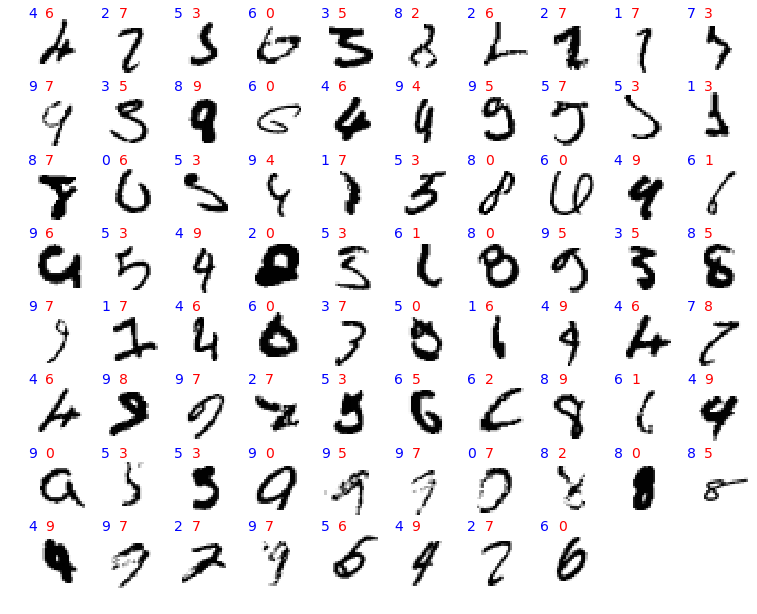

In [23]:
y_hat = model.predict_classes(X_test)
test_wrong = [y for y in zip(X_test,y_hat,y_test) if y[1] != y[2]]
print("Total Misclassifcations in Test Data(10000): %d"%len(test_wrong))
plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')